# Capstone Project — The Battle of Neighbourhoods

## Data Science Project on Kolkata Restaurants

## Author - Dilip K Mondal, IT System Evangelist

# Business Problem section


##  Background

Kolkata  is the capital of the Indian state of West Bengal. Located on the eastern bank of the Hooghly River, the city is approximately 80 kilometres (50 mi) west of the border with Bangladesh. It is the primary business, commercial, and financial hub of Eastern India and the main port of communication for North-East India,  as well as having the third-largest urban economy of India. Kolkata is home to 9,600 millionaires and 4 billionaires with a total wealth of $290 billion.  According to the 2011 Indian census, Kolkata is the seventh-most populous city in India, with a population of 4.5 million residents within the city limits, and a population of over 14.1 million residents in the Kolkata Metropolitan Area, making it the third-most populous metropolitan area in India. The Port of Kolkata is India's oldest operating port and its sole major riverine port. Kolkata is known as the "cultural capital of India" for the city's historical and architectural significance.


The official language of Kolkata and the one that is most widely spoken is Bengali. However, English is also spoken as a formal language within businesses and government agencies. Over the last few years, it is continuously grown because of the city’s important role in government and commercial business.

## Business Problem
With it’s diverse culture , comes diverse food items. There are many restaurants in Kolkata City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of Kolkata City .
 
What is best location in Kolkata City for Chinese Cuisine ?\
Which areas have large number of Chinese restaurant Market ?\
Which all areas have less number of restaurant ?\
Which is the best place to stay if I prefer Chinese Cuisine ?\
What places are have best restaurant in Kolkata?

# Data section

Kolkata restaurants data that contains list Locality, restaurant name,Rating along with their latitude and longitude.\
Data source : Zomato kaggel dataset(https://www.kaggle.com/shrutimehta/zomato-restaurants-data). \
Description : This data set contains the required information. And we will use this data set to explore various locality of kolkata city.\
Nearby places in each locality of Kolkata city.\
Data source : Fousquare API (https://developer.foursquare.com/) \
Description : By using this api we will get all the venues in each neighborhood.

## Methodology section 

The Methodology section will describe the main components of our analysis and predication system. The Methodology section comprises four stages:

1. Collect Inspection Data
2. Explore and Understand Data
3. Data preparation and preprocessing 
4. Modeling

### Approach 
Collect the Kolkata city data from Zomato kaggel dataset(https://www.kaggle.com/shrutimehta/zomato-restaurants-data). \
Using FourSquare API we will find all venues for each neighborhood.\
Filter out all venues that are nearby by locality.\
Using aggregative rating for each resturant to find the best places.\
Visualize the Ranking of neighborhoods using folium library(python)



# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-forge
    pytz-2021.1                |     pyhd8ed1ab_0         239 KB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-

# Read the zomato resturant data from csv file

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/DilipGitAdmin2021/Final-Project/66ef2ec31f35d17cd396647f7a3e8f5ba37790b6/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Explore and Understand Data
Let's read the dataset that we collected above

In [6]:

df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'Kolkata']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18217475,Asia Kitchen by Mainland China,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata",88.393294,22.514688,"Asian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.6,Dark Green,Excellent,945
1,18249144,Hoppipola,1,Kolkata,"4th Floor, Acropolis Mall, 1858/1, Rajdanga Ma...","Acropolis Mall, Kasba","Acropolis Mall, Kasba , Kolkata",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,1103
2,18017612,Spice Kraft,1,Kolkata,"54/1/2A, Hazra Road, Ballygunge Phari, Near Ha...",Ballygunge,"Ballygunge, Kolkata",88.364453,22.526461,"Continental, Middle Eastern, Asian",...,Indian Rupees(Rs.),No,No,No,No,3,4.8,Dark Green,Excellent,1424
3,18377112,Nawwarah,1,Kolkata,"48A, Syed Amir Ali Avenue, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,326
4,20002,6 Ballygunge Place,1,Kolkata,"6, Ballygunge Place, Ballygunge, Kolkata",Ballygunge,"Ballygunge, Kolkata",88.368628,22.527893,Bengali,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.4,Green,Very Good,1778


# Data Cleaning
Let's now remove the unwanted columns and rows from dataset

In [7]:
df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [8]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [9]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Asia Kitchen by Mainland China,"Acropolis Mall, Kasba",88.393294,22.514688,"Asian, Chinese",4.6,Excellent,945
1,Hoppipola,"Acropolis Mall, Kasba",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",4.2,Very Good,1103
2,Spice Kraft,Ballygunge,88.364453,22.526461,"Continental, Middle Eastern, Asian",4.8,Excellent,1424
3,Nawwarah,Ballygunge,88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",3.9,Good,326
4,6 Ballygunge Place,Ballygunge,88.368628,22.527893,Bengali,4.4,Very Good,1778


# Now Let's create map to show the restaurant cluters

In [11]:

Kolkata_Rest = folium.Map(location=[22.5726, 88.3639], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Kolkata_Rest)  

Kolkata_Rest

In [12]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Asia Kitchen by Mainland China,"Acropolis Mall, Kasba",88.393294,22.514688,"Asian, Chinese",4.6,Excellent,945,3
1,Hoppipola,"Acropolis Mall, Kasba",88.393310,22.514585,"Italian, Mexican, American, Mediterranean",4.2,Very Good,1103,3
2,Spice Kraft,Ballygunge,88.364453,22.526461,"Continental, Middle Eastern, Asian",4.8,Excellent,1424,2
3,Nawwarah,Ballygunge,88.364878,22.538731,"Chinese, Cafe, North Indian, Desserts",3.9,Good,326,2
4,6 Ballygunge Place,Ballygunge,88.368628,22.527893,Bengali,4.4,Very Good,1778,2


# What places are having best restaurants in Kolkata

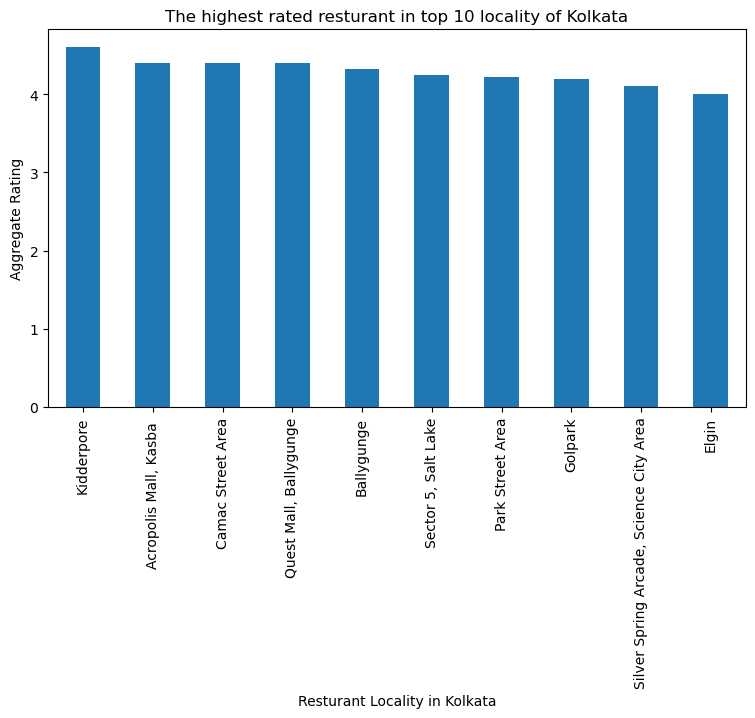

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturants in top 10 locality of Kolkata')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

### Kidderpore has highest rated resturants in  Kolkata

# What places are having worst restaurants in Kolkata

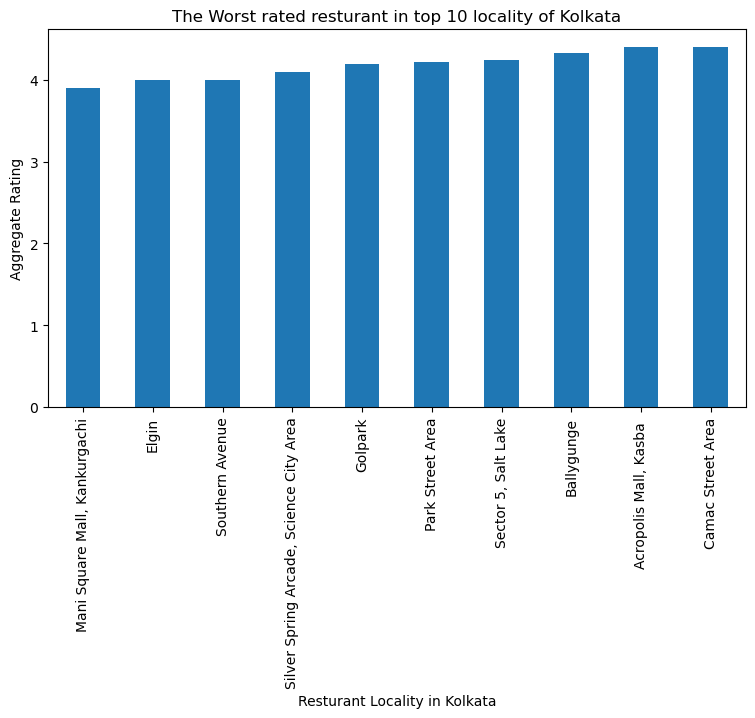

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Kolkata')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

# Which place are suitable for foodie(s)  in Kolkata?

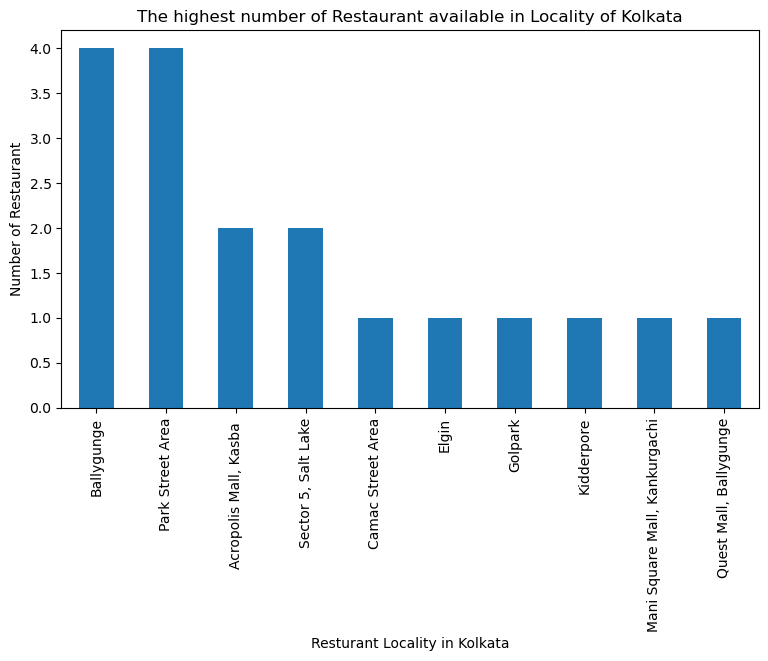

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Kolkata')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

# Which place are not suitable for foodie(s)  in Kolkata

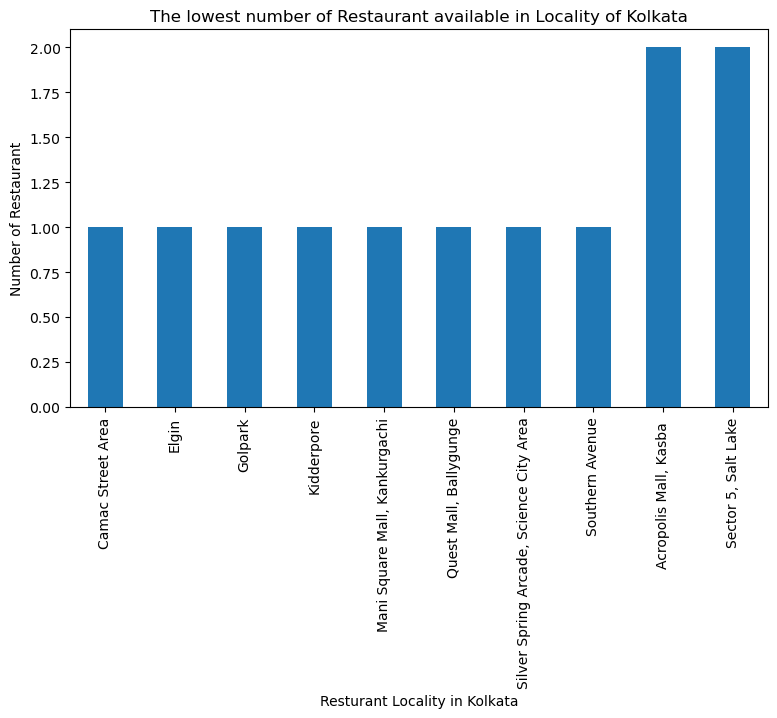

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Kolkata')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

# What are the best localities having chinese restaurants in Kolkata

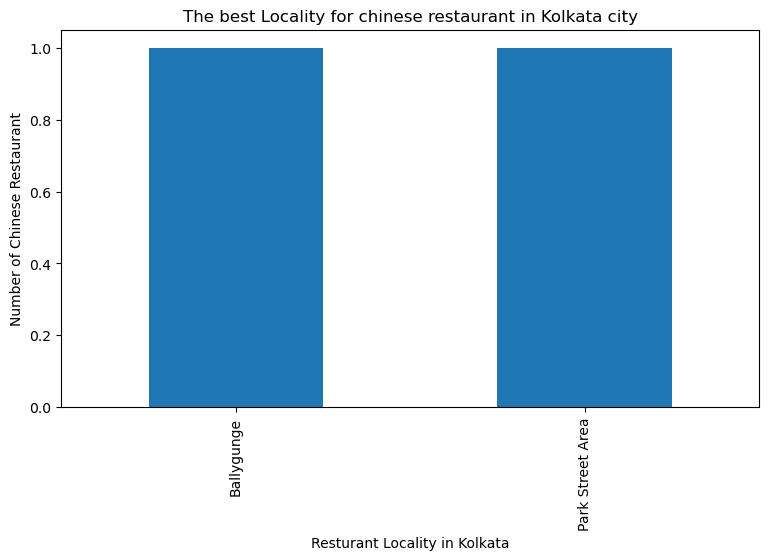

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in Kolkata city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

# which places are having the best chinese resturants in Kolkata?

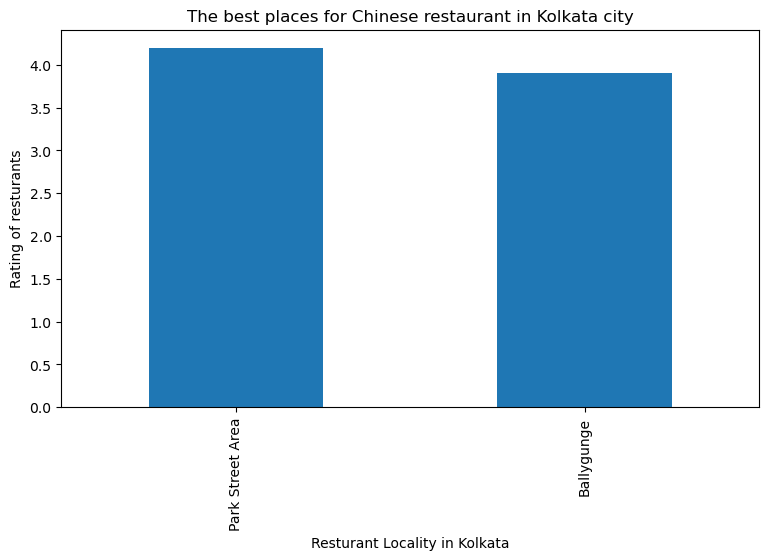

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in Kolkata city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Kolkata')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

# Data transformation
## Based on Locality grouping the data

In [19]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [20]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"Acropolis Mall, Kasba",22.514636,88.393302,2,"Asian, Chinese, Italian, Mexican, American, Me...",4.400,"Excellent, Very Good",2048
1,Ballygunge,22.531687,88.366044,4,"Continental, Middle Eastern, Asian, Chinese, C...",4.325,"Excellent, Good, Very Good",4232
2,Camac Street Area,22.547186,88.350680,1,"North Indian, Chinese, Mexican, Italian",4.400,Very Good,1484
3,Elgin,22.537960,88.349843,1,"Tex-Mex, American",4.000,Very Good,911
4,Golpark,22.515082,88.367830,1,"Seafood, Chinese",4.200,Very Good,2584


In [21]:
df_final.shape

(12, 8)

## Define Foursquare Credentials and Version

In [22]:

## Define Foursquare Credentials and Version
CLIENT_ID = '3K5F2NJXOMXL4T0KCBITVS34KY3QNJMLH1YQVBL2DNAW5CZ1' # Foursquare ID
CLIENT_SECRET = '1SJVH3WTVTMJZFQBC0GMNTPFOICQZZFIU5M0OPLJ1SEQJDIW' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3K5F2NJXOMXL4T0KCBITVS34KY3QNJMLH1YQVBL2DNAW5CZ1
CLIENT_SECRET:1SJVH3WTVTMJZFQBC0GMNTPFOICQZZFIU5M0OPLJ1SEQJDIW


## Let's create a function to repeat the same process to all the Locality in Kolkata

In [23]:

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Let's find all the local venues in Kolkata

In [25]:
# find the venues in all Kolkata Locality
kolkata_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                )

Acropolis Mall, Kasba 
Ballygunge
Camac Street Area
Elgin
Golpark
Kidderpore
Mani Square Mall, Kankurgachi
Park Street Area
Quest Mall, Ballygunge
Sector 5, Salt Lake
Silver Spring Arcade, Science City Area
Southern Avenue


In [26]:
kolkata_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Acropolis Mall, Kasba",22.514636,88.393302,Acropolis Mall,22.514823,88.393235,Shopping Mall
1,"Acropolis Mall, Kasba",22.514636,88.393302,Cinépolis,22.514824,88.393236,Multiplex
2,"Acropolis Mall, Kasba",22.514636,88.393302,Punjabee Rasoi,22.515974,88.392545,Dhaba
3,"Acropolis Mall, Kasba",22.514636,88.393302,Naushijaan Restaurant - Lazzat e Lucknow,22.515238,88.389958,Awadhi Restaurant
4,"Acropolis Mall, Kasba",22.514636,88.393302,Balaram Mullick & Radharaman Mullick,22.513986,88.397438,Indian Sweet Shop


In [27]:
kolkata_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"Acropolis Mall, Kasba",11,11,11,11,11,11
Ballygunge,10,10,10,10,10,10
Camac Street Area,23,23,23,23,23,23
Elgin,22,22,22,22,22,22
Golpark,5,5,5,5,5,5
Kidderpore,5,5,5,5,5,5
"Mani Square Mall, Kankurgachi",15,15,15,15,15,15
Park Street Area,43,43,43,43,43,43
"Quest Mall, Ballygunge",18,18,18,18,18,18


In [28]:
print('There are {} uniques categories.'.format(len(kolkata_venues['Venue Category'].unique())))

There are 59 uniques categories.


#  Analyze Each Locality

In [32]:
## Analyze Each Locality

# one hot encoding
kolkata_onehot = pd.get_dummies(kolkata_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
kolkata_onehot['Locality'] = kolkata_venues['Locality'] 

# move Locality column to the first column
column_list = kolkata_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
kolkata_onehot = kolkata_onehot[column_list]

kolkata_onehot.head()

,Locality,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,Bookstore,...,Shopping Mall,Snack Place,South Indian Restaurant,Sports Club,Steakhouse,Tea Room,Tex-Mex Restaurant,Theme Restaurant,Tram Station,Vegetarian / Vegan Restaurant
0,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Acropolis Mall, Kasba",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Acropolis Mall, Kasba",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Let's group using locality Data

In [33]:
kolkata_grouped = kolkata_onehot.groupby('Locality').mean().reset_index()
kolkata_grouped

,Locality,American Restaurant,Arts & Crafts Store,Asian Restaurant,Awadhi Restaurant,BBQ Joint,Bakery,Bar,Bengali Restaurant,Bookstore,...,Shopping Mall,Snack Place,South Indian Restaurant,Sports Club,Steakhouse,Tea Room,Tex-Mex Restaurant,Theme Restaurant,Tram Station,Vegetarian / Vegan Restaurant
0,"Acropolis Mall, Kasba",0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.090909,0.000000,0.000000,0.0,0.000000,0.000000,0.090909,0.000000,0.0,0.000000
1,Ballygunge,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.000000,0.0,0.100000
2,Camac Street Area,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.130435,0.000000,0.043478,0.0,0.000000,0.043478,0.000000,0.000000,0.0,0.000000
3,Elgin,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.045455,0.000000,0.000000,0.0,0.000000,0.045455,0.000000,0.000000,0.0,0.000000
4,Golpark,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Kidderpore,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.2,0.000000
6,"Mani Square Mall, Kankurgachi",0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.066667,0.0,0.066667
7,Park Street Area,0.000000,0.000000,0.046512,0.000000,0.046512,0.023256,0.000000,0.000000,0.023256,...,0.023256,0.023256,0.000000,0.0,0.023256,0.023256,0.000000,0.000000,0.0,0.000000
8,"Quest Mall, Ballygunge",0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,...,0.055556,0.000000,0.000000,0.0,0.000000,0.000000,0.055556,0.000000,0.0,0.000000
9,"Sector 5, Salt Lake",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [34]:

kolkata_grouped.shape

(12, 60)

# Now let's print each Locality along with the top 5 most common venues

In [35]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in kolkata_grouped['Locality']:
    print("----"+hood+"----")
    temp = kolkata_grouped[kolkata_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Acropolis Mall, Kasba ----
                venue  freq
0               Dhaba  0.09
1               Hotel  0.09
2          Restaurant  0.09
3   Awadhi Restaurant  0.09
4  Tex-Mex Restaurant  0.09


----Ballygunge----
                           venue  freq
0                         Bakery   0.2
1  Vegetarian / Vegan Restaurant   0.1
2                    Sports Club   0.1
3              Indian Sweet Shop   0.1
4                     Hookah Bar   0.1


----Camac Street Area----
                venue  freq
0       Shopping Mall  0.13
1  Italian Restaurant  0.09
2                Café  0.09
3           Nightclub  0.09
4   Indian Restaurant  0.09


----Elgin----
                  venue  freq
0                  Café  0.14
1   American Restaurant  0.09
2    Bengali Restaurant  0.09
3             Nightclub  0.09
4  Fast Food Restaurant  0.09


----Golpark----
                venue  freq
0               Plaza   0.2
1  Mughlai Restaurant   0.2
2  Chinese Restaurant   0.2
3  Bengali Restaurant   

In [36]:

## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = kolkata_grouped['Locality']

for ind in np.arange(kolkata_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kolkata_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kasba",Chinese Restaurant,Shopping Mall,Hotel,Fried Chicken Joint,Dhaba,Multiplex,Department Store,Restaurant,Indian Sweet Shop,Awadhi Restaurant
1,Ballygunge,Bakery,Vegetarian / Vegan Restaurant,Sports Club,Pizza Place,Indian Sweet Shop,Plaza,Bengali Restaurant,Hookah Bar,Dhaba,Gym
2,Camac Street Area,Shopping Mall,Italian Restaurant,Mexican Restaurant,Nightclub,Hotel,Café,Indian Restaurant,Planetarium,Gastropub,Dhaba
3,Elgin,Café,American Restaurant,Bengali Restaurant,Fast Food Restaurant,Nightclub,Restaurant,Department Store,Food Court,Gym,Hotel
4,Golpark,Bengali Restaurant,Mughlai Restaurant,Plaza,Chinese Restaurant,Café,Falafel Restaurant,Fast Food Restaurant,Food Court,Vegetarian / Vegan Restaurant,Department Store
5,Kidderpore,Pharmacy,Tram Station,Awadhi Restaurant,Market,Pub,Vegetarian / Vegan Restaurant,Hotel,Hookah Bar,Gym,Gastropub
6,"Mani Square Mall, Kankurgachi",Café,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Shopping Mall,Clothing Store,Indian Restaurant,Bowling Alley,Restaurant,Multiplex,Mediterranean Restaurant
7,Park Street Area,Café,Hotel,Nightclub,Indian Restaurant,Restaurant,Pub,Pizza Place,Asian Restaurant,BBQ Joint,Chinese Restaurant
8,"Quest Mall, Ballygunge",Indian Restaurant,Café,Indian Sweet Shop,Irish Pub,Hotel,Hookah Bar,Fast Food Restaurant,Mughlai Restaurant,Multiplex,Department Store
9,"Sector 5, Salt Lake",Café,IT Services,Pizza Place,Indian Restaurant,Multiplex,Fried Chicken Joint,Bar,Bengali Restaurant,Seafood Restaurant,Sandwich Place


# Cluster Locality - Run k-means to cluster the Locality into 5 clusters.

In [41]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

kolkata_clustering = kolkata_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kolkata_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(12,)

In [42]:
# add clustering labels
kolkata_merged = df_final.head(240)
kolkata_merged['Cluster Labels'] = kmeans.labels_

# merge kolkata_grouped with df_Chinese to add latitude/longitude for each Locality
kolkata_merged = kolkata_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

kolkata_merged.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Acropolis Mall, Kasba",22.514636,88.393302,2,"Asian, Chinese, Italian, Mexican, American, Me...",4.400,"Excellent, Very Good",2048,0,Chinese Restaurant,Shopping Mall,Hotel,Fried Chicken Joint,Dhaba,Multiplex,Department Store,Restaurant,Indian Sweet Shop,Awadhi Restaurant
1,Ballygunge,22.531687,88.366044,4,"Continental, Middle Eastern, Asian, Chinese, C...",4.325,"Excellent, Good, Very Good",4232,3,Bakery,Vegetarian / Vegan Restaurant,Sports Club,Pizza Place,Indian Sweet Shop,Plaza,Bengali Restaurant,Hookah Bar,Dhaba,Gym
2,Camac Street Area,22.547186,88.350680,1,"North Indian, Chinese, Mexican, Italian",4.400,Very Good,1484,0,Shopping Mall,Italian Restaurant,Mexican Restaurant,Nightclub,Hotel,Café,Indian Restaurant,Planetarium,Gastropub,Dhaba
3,Elgin,22.537960,88.349843,1,"Tex-Mex, American",4.000,Very Good,911,0,Café,American Restaurant,Bengali Restaurant,Fast Food Restaurant,Nightclub,Restaurant,Department Store,Food Court,Gym,Hotel
4,Golpark,22.515082,88.367830,1,"Seafood, Chinese",4.200,Very Good,2584,2,Bengali Restaurant,Mughlai Restaurant,Plaza,Chinese Restaurant,Café,Falafel Restaurant,Fast Food Restaurant,Food Court,Vegetarian / Vegan Restaurant,Department Store


In [43]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kolkata_merged['Lat'], kolkata_merged['Lng'], kolkata_merged['Locality'], kolkata_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
## Examine Clusters

## Cluster 1
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 0, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,22.514636,4.400,"Excellent, Very Good",2048,0,Chinese Restaurant,Shopping Mall,Hotel,Fried Chicken Joint,Dhaba,Multiplex,Department Store,Restaurant,Indian Sweet Shop,Awadhi Restaurant
2,22.547186,4.400,Very Good,1484,0,Shopping Mall,Italian Restaurant,Mexican Restaurant,Nightclub,Hotel,Café,Indian Restaurant,Planetarium,Gastropub,Dhaba
3,22.537960,4.000,Very Good,911,0,Café,American Restaurant,Bengali Restaurant,Fast Food Restaurant,Nightclub,Restaurant,Department Store,Food Court,Gym,Hotel
6,22.577821,3.900,Good,1064,0,Café,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Shopping Mall,Clothing Store,Indian Restaurant,Bowling Alley,Restaurant,Multiplex,Mediterranean Restaurant
7,22.552495,4.225,"Excellent, Good, Very Good",19079,0,Café,Hotel,Nightclub,Indian Restaurant,Restaurant,Pub,Pizza Place,Asian Restaurant,BBQ Joint,Chinese Restaurant
8,22.539129,4.400,Very Good,2224,0,Indian Restaurant,Café,Indian Sweet Shop,Irish Pub,Hotel,Hookah Bar,Fast Food Restaurant,Mughlai Restaurant,Multiplex,Department Store
9,22.569363,4.250,"Excellent, Good",7006,0,Café,IT Services,Pizza Place,Indian Restaurant,Multiplex,Fried Chicken Joint,Bar,Bengali Restaurant,Seafood Restaurant,Sandwich Place


In [46]:
## Examine Clusters

## Cluster 2
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 1, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,22.538999,4.6,Excellent,1219,1,Pharmacy,Tram Station,Awadhi Restaurant,Market,Pub,Vegetarian / Vegan Restaurant,Hotel,Hookah Bar,Gym,Gastropub


In [47]:
## Examine Clusters

## Cluster 3
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 2, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,22.515082,4.2,Very Good,2584,2,Bengali Restaurant,Mughlai Restaurant,Plaza,Chinese Restaurant,Café,Falafel Restaurant,Fast Food Restaurant,Food Court,Vegetarian / Vegan Restaurant,Department Store
11,22.514119,4.0,Very Good,1126,2,Café,Boutique,Vegetarian / Vegan Restaurant,Arts & Crafts Store,Coffee Shop,Plaza,Bakery,Chinese Restaurant,Food Court,Fried Chicken Joint


In [48]:
## Examine Clusters

## Cluster 4
kolkata_merged.loc[kolkata_merged['Cluster Labels'] ==3 , kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,22.531687,4.325,"Excellent, Good, Very Good",4232,3,Bakery,Vegetarian / Vegan Restaurant,Sports Club,Pizza Place,Indian Sweet Shop,Plaza,Bengali Restaurant,Hookah Bar,Dhaba,Gym


In [49]:
## Examine Clusters

## Cluster 5
kolkata_merged.loc[kolkata_merged['Cluster Labels'] == 4, kolkata_merged.columns[[1] + list(range(5, kolkata_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,22.5491,4.1,Very Good,1616,4,Hotel,Indian Restaurant,Asian Restaurant,Bengali Restaurant,Multicuisine Indian Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Dhaba,IT Services,Hookah Bar



# Conclusion
Ballygaunge  and Park Street Area are hosting some of the best neighborhoods for Chinese cuisine.\
Park Street Area and Ballygaunge have the best Chinese Restaurant.\
Park Street Area and Ballygaunge &  Acropolis Mall are the best places for edible person.\
Kidderpore, Acropolis Mall, Camac Street, Quest Mall have best rated restaurants in Kolkata.\


### Cluster 1: It is most recommended for Indian Restaurants. 
### Cluster 2: It is most recommended for Hotels and nightclub. 
### Cluster 3 and Cluster 5: It is most recommended for Fast food. 
### Cluster 4: It is most recommended for the cafe and pizza.

